# 数据框出报表：数据科学之分进合击分析策略
![06_groupby.svg](https://pandas.pydata.org/pandas-docs/version/1.0.2/_images/06_groupby.svg)


In [71]:
import pandas as pd

In [58]:
# A0 简单读档并查看数据框讯息
# 注意看Dtype! 
df = pd.read_csv ("20春_pandas_week02_hurun_unicorn.tsv", encoding = "utf8", sep="\t")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 10 columns):
排名              494 non-null int64
企业名称            494 non-null object
Company Name    494 non-null object
估值（亿人民币）        494 non-null int64
国家              494 non-null object
城市              494 non-null object
行业              494 non-null object
掌门人/创始人         494 non-null object
成立年份            494 non-null int64
部分投资机构          494 non-null object
dtypes: int64(3), object(7)
memory usage: 38.7+ KB


* int数值可用作运算，object对象只能用来分类

### 挑战A1：如法泡制


* 先国再城
* 先行再城

In [99]:
# A1 原完整代码
先国再行 = df.groupby ( by = ['国家','行业'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
             .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
先行再国 = df.groupby ( by = ['行业', '国家'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
             .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
display(先国再行)
display(先行再国)

with pd.ExcelWriter("20春_pandas_week03_hurun_unicorn.xlsx") as writer:
    先国再行.to_excel(writer,sheet_name="先国再行") 
    先行再国.to_excel(writer,sheet_name="先行再国") 

企业名称 估值（亿人民币）              成立年份      
             数量       总和          均值    最新    最早
国家   行业                                         
中国   金融科技    22    17960  816.363636  2018  2002
     媒体和娱乐   17     8230  484.117647  2015  2003
美国   云计算     32     6880  215.000000  2015  2000
     共享经济     6     5670  945.000000  2017  2008
     金融科技    21     5020  239.047619  2017  2000
...         ...      ...         ...   ...   ...
日本   区块链      1       70   70.000000  2014  2014
法国   人工智能     1       70   70.000000  2016  2016
     媒体和娱乐    1       70   70.000000  2006  2006
爱沙尼亚 共享经济     1       70   70.000000  2013  2013
法国   健康科技     1       70   70.000000  2013  2013

[103 rows x 5 columns]

企业名称 估值（亿人民币）              成立年份      
             数量       总和          均值    最新    最早
行业    国家                                        
金融科技  中国     22    17960  816.363636  2018  2002
媒体和娱乐 中国     17     8230  484.117647  2015  2003
云计算   美国     32     6880  215.000000  2015  2000
共享经济  美国      6     5670  945.000000  2017  2008
金融科技  美国     21     5020  239.047619  2017  2000
...         ...      ...         ...   ...   ...
房地产科技 菲律宾     1       70   70.000000  2015  2015
物流    哥伦比亚    1       70   70.000000  2016  2016
游戏    印度      1       70   70.000000  2012  2012
消费品   芬兰      1       70   70.000000  2016  2016
金融科技  韩国      1       70   70.000000  2011  2011

[103 rows x 5 columns]

In [100]:
# A1-Extra 完整代码，多来2页：先国再城，先行再城
先国再城 = df.groupby ( by = ['国家','城市'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
             .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
先城再国 = df.groupby ( by = ['城市', '国家'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
             .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
display(先国再城)
display(先城再国)

with pd.ExcelWriter("20春_pandas_week03_hurun_unicorn.xlsx") as writer:
    先国再城.to_excel(writer,sheet_name="先国再城") 
    先城再国.to_excel(writer,sheet_name="先城再国") 
# ( 來來來 )

企业名称 估值（亿人民币）              成立年份      
           数量       总和          均值    最新    最早
国家   城市                                       
中国   北京    81    22130  273.209877  2019  2001
美国   旧金山   55    17060  310.181818  2017  2004
中国   杭州    19    13290  699.473684  2015  2000
     上海    47     8990  191.276596  2017  2001
美国   纽约    25     8640  345.600000  2015  2002
...       ...      ...         ...   ...   ...
哥伦比亚 波哥大    1       70   70.000000  2016  2016
美国   盐湖城    1       70   70.000000  2008  2008
     罗利     1       70   70.000000  2011  2011
印度   孟买     1       70   70.000000  2012  2012
美国   半月湾    1       70   70.000000  2014  2014

[121 rows x 5 columns]

企业名称 估值（亿人民币）              成立年份      
            数量       总和          均值    最新    最早
城市   国家                                        
北京   中国     81    22130  273.209877  2019  2001
旧金山  美国     55    17060  310.181818  2017  2004
杭州   中国     19    13290  699.473684  2015  2000
上海   中国     47     8990  191.276596  2017  2001
纽约   美国     25     8640  345.600000  2015  2002
...        ...      ...         ...   ...   ...
塔林   爱沙尼亚    1       70   70.000000  2013  2013
普莱森顿 美国      1       70   70.000000  2012  2012
苗必达  美国      1       70   70.000000  2007  2007
菲尼克斯 美国      1       70   70.000000  2015  2015
马德里  西班牙     1       70   70.000000  2011  2011

[121 rows x 5 columns]

### rename



In [101]:
# A2-Extra 完整代码，多来中继，说明rename
先国再行 = df.groupby ( by = ['国家','行业'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
            

display(先国再行)

with pd.ExcelWriter("20春_pandas_week03_hurun_unicorn.xlsx") as writer:
    先国再行.to_excel(writer,sheet_name="先国再行") 
   
先国再行 = df.groupby ( by = ['国家','行业'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
             .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
display(先国再行)

with pd.ExcelWriter("20春_pandas_week03_hurun_unicorn.xlsx") as writer:
    先国再行.to_excel(writer,sheet_name="先国再行") 
# ( 來來來 )

企业名称 估值（亿人民币）              成立年份      
           count      sum        mean   max   min
国家   行业                                          
中国   金融科技     22    17960  816.363636  2018  2002
     媒体和娱乐    17     8230  484.117647  2015  2003
美国   云计算      32     6880  215.000000  2015  2000
     共享经济      6     5670  945.000000  2017  2008
     金融科技     21     5020  239.047619  2017  2000
...          ...      ...         ...   ...   ...
日本   区块链       1       70   70.000000  2014  2014
法国   人工智能      1       70   70.000000  2016  2016
     媒体和娱乐     1       70   70.000000  2006  2006
爱沙尼亚 共享经济      1       70   70.000000  2013  2013
法国   健康科技      1       70   70.000000  2013  2013

[103 rows x 5 columns]

企业名称 估值（亿人民币）              成立年份      
             数量       总和          均值    最新    最早
国家   行业                                         
中国   金融科技    22    17960  816.363636  2018  2002
     媒体和娱乐   17     8230  484.117647  2015  2003
美国   云计算     32     6880  215.000000  2015  2000
     共享经济     6     5670  945.000000  2017  2008
     金融科技    21     5020  239.047619  2017  2000
...         ...      ...         ...   ...   ...
日本   区块链      1       70   70.000000  2014  2014
法国   人工智能     1       70   70.000000  2016  2016
     媒体和娱乐    1       70   70.000000  2006  2006
爱沙尼亚 共享经济     1       70   70.000000  2013  2013
法国   健康科技     1       70   70.000000  2013  2013

[103 rows x 5 columns]

* 其中columns代表要对列名进行修改，在columns后面是一个字典形式，键是原列名，值是新列名。修改的时候只会改选择到的列。
* rename()函数适合于修改个别的索引或者列名
* rename能更清楚让别人知道表格表达内容

### 用agg直接改名

In [102]:
df.groupby(["国家","行业"])["估值（亿人民币）"].agg(sum="sum",mean="mean",count="count")
df.groupby(["国家","行业"])["估值（亿人民币）"].agg(合计="sum",平均="mean",数量="count")

合计          平均  数量
国家  行业                        
中国  云计算    460   92.000000   5
    人工智能  2090  139.333333  15
    健康科技  2060  158.461538  13
    共享经济  4740  592.500000   8
    区块链   1250  312.500000   4
...        ...         ...  ..
韩国  游戏     350  350.000000   1
    物流     200  200.000000   1
    电子商务   740  246.666667   3
    金融科技    70   70.000000   1
马耳他 区块链    150  150.000000   1

[103 rows x 3 columns]

### sort_values



In [103]:
# A3-Extra 完整代码，多来中继，说明rename
先国再行 = df.groupby ( by = ['国家','行业'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
            

display(先国再行)

with pd.ExcelWriter("20春_pandas_week03_hurun_unicorn.xlsx") as writer:
    先国再行.to_excel(writer,sheet_name="先国再行") 

    
    
先国再行 = df.groupby ( by = ['国家','行业'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
       .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )     
   
display(先国再行)

with pd.ExcelWriter("20春_pandas_week03_hurun_unicorn.xlsx") as writer:
    先国再行.to_excel(writer,sheet_name="先国再行") 
    

企业名称 估值（亿人民币）              成立年份      
           count      sum        mean   max   min
国家   行业                                          
中国   金融科技     22    17960  816.363636  2018  2002
     媒体和娱乐    17     8230  484.117647  2015  2003
美国   云计算      32     6880  215.000000  2015  2000
     共享经济      6     5670  945.000000  2017  2008
     金融科技     21     5020  239.047619  2017  2000
...          ...      ...         ...   ...   ...
日本   区块链       1       70   70.000000  2014  2014
法国   人工智能      1       70   70.000000  2016  2016
     媒体和娱乐     1       70   70.000000  2006  2006
爱沙尼亚 共享经济      1       70   70.000000  2013  2013
法国   健康科技      1       70   70.000000  2013  2013

[103 rows x 5 columns]

企业名称 估值（亿人民币）              成立年份      
           数量       总和          均值    最新    最早
国家  行业                                        
中国  云计算     5      460   92.000000  2015  2011
    人工智能   15     2090  139.333333  2016  2009
    健康科技   13     2060  158.461538  2019  2000
    共享经济    8     4740  592.500000  2016  2011
    区块链     4     1250  312.500000  2017  2013
...       ...      ...         ...   ...   ...
韩国  游戏      1      350  350.000000  2007  2007
    物流      1      200  200.000000  2011  2011
    电子商务    3      740  246.666667  2010  2005
    金融科技    1       70   70.000000  2011  2011
马耳他 区块链     1      150  150.000000  2017  2017

[103 rows x 5 columns]

## pandas中的sort_values()函数原理类似于SQL中的order by，可以将数据集依照某个字段中的数据进行排序，该函数即可根据指定列数据也可根据指定行的数据排序。
* by 	指定列名(axis=0或’index’)或索引值(axis=1或’columns’)
* axis 	若axis=0或’index’，则按照指定列中数据大小排序；若axis=1或’columns’，则按照指定索引中数据大小排序，默认axis=0
* ascending 	是否按指定列的数组升序排列，默认为True，即升序排列
* inplace 	是否用排序后的数据集替换原来的数据，默认为False，即不替换
* na_position 	{‘first’,‘last’}，设定缺失值的显示位置

### agg的几种方法
* df.groupby(["国家","行业"]).agg({"估值（亿人民币）":["sum","mean","count"]})
* df.groupby(["国家","行业"])["估值（亿人民币）"].agg(sum="sum",mean="mean",count="count")
* df.groupby(["国家","行业"])["估值（亿人民币）"].agg（["sum","mean","count"]）

### agg 参数 的报表顺序

原来顺序是：
* (    '企业名称', '数量')
* ('估值（亿人民币）', '总和')
* ('估值（亿人民币）', '均值')
* (    '成立年份', '最新')
* (    '成立年份', '最早')

请改顺序为：
* (    '成立年份', '最早')
* (    '成立年份', '最新')
* (    '企业名称', '数量')
* ('估值（亿人民币）', '均值')
* ('估值（亿人民币）', '总和')


In [104]:
# A4-Extra agg 参数 的报表顺序
先国再行 = df.groupby ( by = ['国家','行业'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
             .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
display(先国再行)

with pd.ExcelWriter("20春_pandas_week03_hurun_unicorn.xlsx") as writer:
    先国再行.to_excel(writer,sheet_name="先国再行") 
    

先国再行 = df.groupby ( by = ['国家','行业'] ) \
             .agg ({ "成立年份":["min","max"], \
                     "企业名称" : "count", \
                     "估值（亿人民币）":["mean","sum"], 
                                                       }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
             .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
display(先国再行)

with pd.ExcelWriter("20春_pandas_week03_hurun_unicorn.xlsx") as writer:
    先国再行.to_excel(writer,sheet_name="先国再行") 
# ( 來來來 )

企业名称 估值（亿人民币）              成立年份      
             数量       总和          均值    最新    最早
国家   行业                                         
中国   金融科技    22    17960  816.363636  2018  2002
     媒体和娱乐   17     8230  484.117647  2015  2003
美国   云计算     32     6880  215.000000  2015  2000
     共享经济     6     5670  945.000000  2017  2008
     金融科技    21     5020  239.047619  2017  2000
...         ...      ...         ...   ...   ...
日本   区块链      1       70   70.000000  2014  2014
法国   人工智能     1       70   70.000000  2016  2016
     媒体和娱乐    1       70   70.000000  2006  2006
爱沙尼亚 共享经济     1       70   70.000000  2013  2013
法国   健康科技     1       70   70.000000  2013  2013

[103 rows x 5 columns]

成立年份       企业名称    估值（亿人民币）       
              最早    最新   数量          均值     总和
国家   行业                                       
中国   金融科技   2002  2018   22  816.363636  17960
     媒体和娱乐  2003  2015   17  484.117647   8230
美国   云计算    2000  2015   32  215.000000   6880
     共享经济   2008  2017    6  945.000000   5670
     金融科技   2000  2017   21  239.047619   5020
...          ...   ...  ...         ...    ...
日本   区块链    2014  2014    1   70.000000     70
法国   人工智能   2016  2016    1   70.000000     70
     媒体和娱乐  2006  2006    1   70.000000     70
爱沙尼亚 共享经济   2013  2013    1   70.000000     70
法国   健康科技   2013  2013    1   70.000000     70

[103 rows x 5 columns]

In [105]:
df.groupby(["国家","行业"]).agg({"估值（亿人民币）":["sum","mean","count"]})

估值（亿人民币）                  
              sum        mean count
国家  行业                             
中国  云计算       460   92.000000     5
    人工智能     2090  139.333333    15
    健康科技     2060  158.461538    13
    共享经济     4740  592.500000     8
    区块链      1250  312.500000     4
...           ...         ...   ...
韩国  游戏        350  350.000000     1
    物流        200  200.000000     1
    电子商务      740  246.666667     3
    金融科技       70   70.000000     1
马耳他 区块链       150  150.000000     1

[103 rows x 3 columns]

* 在agg后用一个字典，方法针对估值计算。

### 小结
1. 用 groupby 从表中取出想要的列，对数据内部进行分组处理分组时，（不仅仅可以指定一个列名，也可以指定多个列名。）
2. 用agg在行上聚合函数，可使用下表聚合方法
3. 用排序函数sort_values()将数据集依照某个字段中的数据进行排序，该函数即可根据指定列数据也可根据指定行的数据排序。
4. 用rename()函数修改列名和索引

#### tips
* 先想像好报表内容样式，再开始
  
#### 小坑/小风格
* [Q]代码某几行最后一个字符有 \，指的是什麽意思？
* [A]跟python说此行未结束我要继续写

In [106]:
# agg方法
框框 = pd.DataFrame ( {
        "方法": ["count","sum","mean","median","std、var","min、max","prod","first、last"],
        "意义": ["计算分组中非NA值的数量", "计算非NA值的和", "计算非NA值的平均值", "计算非NA值的算术中位数","计算非NA值标准差和方差","获得非NA值的最小和最大值","计算非NA值的积","获得第一个和最后一个非NA值"],
      } )
框框

,方法,意义
0,count,计算分组中非NA值的数量
1,sum,计算非NA值的和
2,mean,计算非NA值的平均值
3,median,计算非NA值的算术中位数
4,std、var,计算非NA值标准差和方差
5,min、max,获得非NA值的最小和最大值
6,prod,计算非NA值的积
7,first、last,获得第一个和最后一个非NA值


<div class="bg-split"></div>

## 分分分

> <mark>分分分</mark>，接续上周的**切切切**切片 (英文叫slice)，groupby的分分分，是数据科学家将**切切切**的数据解剖刀，在找突破点的后，系统地把全数据拆分多块。<mark>大卸八块</mark>后好分迸合击。要如何分，不只是要会df.groupby的参数始使用，更是开展对知识领域丶统计丶及数据管理的数据形态及标准的数据感修练之旅

-----



### 将对象分成组
* 分类，作为索引
* 我想知道中国某行业里的情况，先有想法，表格不能体现，分类是为了进一步计算

In [107]:
df.head()

,排名,企业名称,Company Name,估值（亿人民币）,国家,城市,行业,掌门人/创始人,成立年份,部分投资机构
0,1,蚂蚁金服,Ant Financial,10000,中国,杭州,金融科技,井贤栋,2014,春华资本、中投海外、红杉资本
1,2,字节跳动,Bytedance,5000,中国,北京,媒体和娱乐,张一鸣,2012,红杉资本、海纳亚洲、纪源资本、启明创投
2,3,滴滴出行,Didi Chuxing,3600,中国,北京,共享经济,程维,2012,腾讯、阿里巴巴、红杉资本、经纬中国、纪源资本
3,4,Infor,Infor,3500,美国,纽约,云计算,Jim Schaper,2002,"Golden Gate Capital, Koch Equity Development"
4,5,JUUL Labs,JUUL Labs,3400,美国,旧金山,消费品,"Adam Bowen, James Monsees, Kevin Burns, Tim Da...",2015,"M13, Timothy Davis, Evolution VC Partners, Tig..."


In [108]:
# 传递给的字符串groupby可以引用列级别或索引级别
按国家分 = df.groupby("国家")
# 并看不到结果

In [109]:
按国家分.dtypes

,排名,企业名称,Company Name,估值（亿人民币）,城市,行业,掌门人/创始人,成立年份,部分投资机构
国家,,,,,,,,,
中国,int64,object,object,int64,object,object,object,int64,object
以色列,int64,object,object,int64,object,object,object,int64,object
卢森堡,int64,object,object,int64,object,object,object,int64,object
印度,int64,object,object,int64,object,object,object,int64,object
印度尼西亚,int64,object,object,int64,object,object,object,int64,object
哥伦比亚,int64,object,object,int64,object,object,object,int64,object
巴西,int64,object,object,int64,object,object,object,int64,object
德国,int64,object,object,int64,object,object,object,int64,object
新加坡,int64,object,object,int64,object,object,object,int64,object


In [110]:
# 多个列作为索引
按国家行业分 = df.groupby(["国家","行业"])

In [111]:
按国家行业分.dtypes

排名    企业名称 Company Name 估值（亿人民币）      城市 掌门人/创始人   成立年份  部分投资机构
国家  行业                                                                      
中国  云计算   int64  object       object    int64  object  object  int64  object
    人工智能  int64  object       object    int64  object  object  int64  object
    健康科技  int64  object       object    int64  object  object  int64  object
    共享经济  int64  object       object    int64  object  object  int64  object
    区块链   int64  object       object    int64  object  object  int64  object
...         ...     ...          ...      ...     ...     ...    ...     ...
韩国  游戏    int64  object       object    int64  object  object  int64  object
    物流    int64  object       object    int64  object  object  int64  object
    电子商务  int64  object       object    int64  object  object  int64  object
    金融科技  int64  object       object    int64  object  object  int64  object
马耳他 区块链   int64  object       object    int64  object  object  int64  object

[103 rows x 8 columns]

In [112]:
按国家行业分.mean()

排名    估值（亿人民币）         成立年份
国家  行业                                       
中国  云计算   230.800000   92.000000  2012.400000
    人工智能  189.333333  139.333333  2013.466667
    健康科技  206.538462  158.461538  2011.384615
    共享经济  148.750000  592.500000  2014.375000
    区块链   116.500000  312.500000  2014.000000
...              ...         ...          ...
韩国  游戏     50.000000  350.000000  2007.000000
    物流     84.000000  200.000000  2011.000000
    电子商务  184.333333  246.666667  2008.333333
    金融科技  264.000000   70.000000  2011.000000
马耳他 区块链   138.000000  150.000000  2017.000000

[103 rows x 3 columns]

### 只有int值数量的部分是可以运算的，对象object只能被分类

### GroupBy对象属性

该groups属性是一个dict，其键是计算出的唯一组，而对应的值是属于每个组的轴标签。在上面的示例中，我们有：

In [113]:
按国家分.groups

{'中国': Int64Index([  0,   1,   2,   6,  10,  11,  12,  13,  14,  19,
             ...
             481, 482, 483, 484, 485, 486, 487, 488, 490, 491],
            dtype='int64', length=206),
 '以色列': Int64Index([178, 184, 190, 310, 364, 384, 415], dtype='int64'),
 '卢森堡': Int64Index([342], dtype='int64'),
 '印度': Int64Index([ 23,  42,  45,  52,  81, 113, 123, 146, 163, 192, 206, 287, 323,
             347, 361, 410, 422, 425, 432, 437, 465],
            dtype='int64'),
 '印度尼西亚': Int64Index([22, 39, 74, 294], dtype='int64'),
 '哥伦比亚': Int64Index([427], dtype='int64'),
 '巴西': Int64Index([66, 344, 358, 389], dtype='int64'),
 '德国': Int64Index([56, 108, 160, 169, 269, 339, 411], dtype='int64'),
 '新加坡': Int64Index([15, 50], dtype='int64'),
 '日本': Int64Index([202, 388], dtype='int64'),
 '法国': Int64Index([149, 317, 320, 396], dtype='int64'),
 '澳大利亚': Int64Index([88], dtype='int64'),
 '爱尔兰': Int64Index([182], dtype='int64'),
 '爱沙尼亚': Int64Index([290], dtype='int64'),
 '瑞典': Int64Index([62, 196], dty

In [114]:
按国家行业分.groups

{('中国', '云计算'): Int64Index([183, 251, 325, 464, 467], dtype='int64'),
 ('中国',
  '人工智能'): Int64Index([46, 63, 91, 102, 153, 218, 241, 255, 267, 285, 337, 401, 402, 403,
             414],
            dtype='int64'),
 ('中国',
  '健康科技'): Int64Index([27, 48, 77, 234, 245, 279, 305, 326, 345, 356, 380, 398, 454], dtype='int64'),
 ('中国',
  '共享经济'): Int64Index([2, 47, 99, 127, 224, 254, 378, 438], dtype='int64'),
 ('中国', '区块链'): Int64Index([19, 87, 150, 226], dtype='int64'),
 ('中国',
  '大数据'): Int64Index([232, 244, 250, 321, 338, 352, 372, 385, 451], dtype='int64'),
 ('中国',
  '媒体和娱乐'): Int64Index([1, 13, 85, 93, 95, 101, 132, 154, 214, 220, 235, 242, 260, 275,
             387, 392, 482],
            dtype='int64'),
 ('中国', '房地产科技'): Int64Index([24, 80, 225, 240, 259, 332, 468], dtype='int64'),
 ('中国',
  '教育科技'): Int64Index([128, 134, 136, 229, 265, 313, 353, 354, 365, 377, 490], dtype='int64'),
 ('中国', '新能源'): Int64Index([328, 423], dtype='int64'),
 ('中国',
  '新能源汽车'): Int64Index([78, 79, 120, 

* 多个索引内容分的是元组，元组是有顺序的，先国家再行业。



## 进进进

* 分好组对自己想要的内容进行计算 

-----


### 计算选项
使用df.info()检查, 看看Dtype非object有哪些

In [115]:
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 10 columns):
排名              494 non-null int64
企业名称            494 non-null object
Company Name    494 non-null object
估值（亿人民币）        494 non-null int64
国家              494 non-null object
城市              494 non-null object
行业              494 non-null object
掌门人/创始人         494 non-null object
成立年份            494 non-null int64
部分投资机构          494 non-null object
dtypes: int64(3), object(7)
memory usage: 38.7+ KB


In [116]:

print ( df["估值（亿人民币）"].agg("sum") )
print ( df["估值（亿人民币）"].sum() )


117970
117970


In [117]:
# agg方法总结
框框 = pd.DataFrame ( {
        "方法": ["count","sum","mean","median","std、var","min、max","prod","first、last"],
        "意义": ["计算分组中非NA值的数量", "计算非NA值的和", "计算非NA值的平均值", "计算非NA值的算术中位数","计算非NA值标准差和方差","获得非NA值的最小和最大值","计算非NA值的积","获得第一个和最后一个非NA值"],
      } )
框框

,方法,意义
0,count,计算分组中非NA值的数量
1,sum,计算非NA值的和
2,mean,计算非NA值的平均值
3,median,计算非NA值的算术中位数
4,std、var,计算非NA值标准差和方差
5,min、max,获得非NA值的最小和最大值
6,prod,计算非NA值的积
7,first、last,获得第一个和最后一个非NA值


<div class="bg-comine"></div>

## 合合合


###  agg 的几种方式（多指标统计的方法）
```python   

df.groupby(["国家","行业"])["估值（亿人民币）"].agg(sum = "sum",mean = "mean",count = "count")
df.groupby(["国家","行业"])["估值（亿人民币）"].agg(["sum","mean","max","min"])
df.groupby(["国家","行业"]).agg({"估值（亿人民币）":["sum","mean","count"]})
```

In [118]:
df.groupby(["国家","行业"])["估值（亿人民币）"].agg(sum = "sum",mean = "mean",count = "count")

sum        mean  count
国家  行业                           
中国  云计算    460   92.000000      5
    人工智能  2090  139.333333     15
    健康科技  2060  158.461538     13
    共享经济  4740  592.500000      8
    区块链   1250  312.500000      4
...        ...         ...    ...
韩国  游戏     350  350.000000      1
    物流     200  200.000000      1
    电子商务   740  246.666667      3
    金融科技    70   70.000000      1
马耳他 区块链    150  150.000000      1

[103 rows x 3 columns]

In [119]:
df.groupby(["国家","行业"])["估值（亿人民币）"].agg(["sum","mean","max","min"])

sum        mean   max  min
国家  行业                               
中国  云计算    460   92.000000   150   70
    人工智能  2090  139.333333   400   70
    健康科技  2060  158.461538   600   70
    共享经济  4740  592.500000  3600   70
    区块链   1250  312.500000   800  100
...        ...         ...   ...  ...
韩国  游戏     350  350.000000   350  350
    物流     200  200.000000   200  200
    电子商务   740  246.666667   600   70
    金融科技    70   70.000000    70   70
马耳他 区块链    150  150.000000   150  150

[103 rows x 4 columns]

In [120]:
df.groupby(["国家","行业"]).agg({"估值（亿人民币）":["sum","mean","count"]})

估值（亿人民币）                  
              sum        mean count
国家  行业                             
中国  云计算       460   92.000000     5
    人工智能     2090  139.333333    15
    健康科技     2060  158.461538    13
    共享经济     4740  592.500000     8
    区块链      1250  312.500000     4
...           ...         ...   ...
韩国  游戏        350  350.000000     1
    物流        200  200.000000     1
    电子商务      740  246.666667     3
    金融科技       70   70.000000     1
马耳他 区块链       150  150.000000     1

[103 rows x 3 columns]

## 数据感

![02_split-apply-comine_detailed.png](02_split-apply-comine_detailed.png#full)

1. 最初整个数据框
2. 分细类
3. 进行聚合计算

### 什么是数据感
* 就是对任何事情，任何看法首先第一要去找依据，而不是凭借自己的主观判断。那么依据从哪里来，就是来自于数据。
* 也就是我们可以通过分类计算去得到我们想要的依据



In [121]:
# E1 Categorical 类型的数据 转换数据类型
print (df.国家)
print (df.国家.astype('category'))

0      中国
1      中国
2      中国
3      美国
4      美国
       ..
489    美国
490    中国
491    中国
492    美国
493    美国
Name: 国家, Length: 494, dtype: object
0      中国
1      中国
2      中国
3      美国
4      美国
       ..
489    美国
490    中国
491    中国
492    美国
493    美国
Name: 国家, Length: 494, dtype: category
Categories (24, object): [中国, 以色列, 卢森堡, 印度, ..., 西班牙, 阿根廷, 韩国, 马耳他]


 * dtype: object变成category，并且告诉你有24个类别

## .boxplot()

中国         AxesSubplot(0.1,0.15;0.363636x0.75)
美国    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

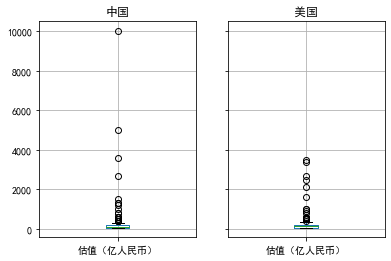

In [122]:
%matplotlib inline
import matplotlib as mpl  
mpl.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签  
mpl.rcParams['axes.unicode_minus']=False #用来正常显示负号 

df[df.国家.isin(["中国","美国"])][['国家',"估值（亿人民币）"]].groupby ( by = '国家' ).boxplot()

* 数据可视化就是要分类看有没有差别

中国         AxesSubplot(0.1,0.15;0.363636x0.75)
美国    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

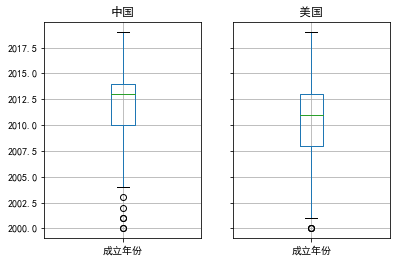

In [123]:
df[df.国家.isin(["中国","美国"])][['国家',"成立年份"]].groupby ( by = '国家' ).boxplot()

* 把中位数、四分位数最大值和最小值做成箱盒图

# 本周我的总结

* 本周我学习了数据框分併合
* groupby和agg的使用方法和意义
* rename和sort_values的意义
* boxplot的用法和看法（怎么看）
* 了解了分组的意义
> 分组统计目标是分组例子和统计描述的这个量度是不是有差的，分进合击有没有差，差在哪？